In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#Import The Necassary Library 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

In [9]:
# For uploading  the Dataset
Email = pd.read_csv('/content/drive/MyDrive/project/Dataset/messages.csv',encoding='utf-8')
Email.head(10)

subject  ... label
0            job posting - apple-iss research center  ...     0
1                                                NaN  ...     0
2  query : letter frequencies for text identifica...  ...     0
3                                               risk  ...     0
4                           request book information  ...     0
5  call for abstracts : optimality in syntactic t...  ...     0
6                m . a . in scandinavian linguistics  ...     0
7  call for papers : linguistics session of the m...  ...     0
8                    foreign language in commercials  ...     0
9  fulbright announcement : please post / dissemi...  ...     0

[10 rows x 3 columns]

In [10]:
#Check the shape 
print ('Shape = >',Email.shape)

Shape = > (2893, 3)


In [11]:
#Count that How Many spam and Not spam
print ('Spam and Not Spam  counts','\n',Email.label.value_counts())

Spam and Not Spam  counts 
 0    2412
1     481
Name: label, dtype: int64


In [12]:
#Check the Null Values of each rows in the dataset
Email.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [13]:
#Drop The nan values with drpona()Function
Email=Email.dropna()

In [14]:
#Check the shape  after drop the NAN subjects 
print ('Shape = >',Email.shape)

Shape = > (2831, 3)


In [15]:
#Count that How Many labels have spam and not spam after Drop the NAN subjects value 
print ('Spam and Not Spam  counts','\n',Email.label.value_counts())

Spam and Not Spam  counts 
 0    2363
1     468
Name: label, dtype: int64


In [16]:
print ('Negitive ratio = ', round(len(Email[Email['label']==1]) / len(Email.label),2)*100,'%')#Calculate the Ratio For NotSpam
print ('Positive ratio  = ', round(len(Email[Email['label']==0]) / len(Email.label),2)*100,'%')#Calculate the Ratio For Spam

Negitive ratio =  17.0 %
Positive ratio  =  83.0 %


In [17]:
#ADD the Length2 Coulmn for Subjects Length
#ADD the Length1 Coulmn for Messsage Length
Email['length1'] = Email.message.str.len()
Email['length2'] = Email.subject.str.len()
Email.head(2)


subject  ... length2
0            job posting - apple-iss research center  ...      39
2  query : letter frequencies for text identifica...  ...      50

[2 rows x 5 columns]

In [18]:
#For Messages 
from unicodedata import normalize#Remobve the Accent For the Meassage

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

Email['message'] = Email['message'].apply(remove_accent)

In [19]:
Email['message'] = Email['message'].str.lower()#Convert itno the Lower case

In [20]:
Email['message'] = Email['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',#Remove the Punctution 
                                 'emailaddress')


Email['message'] = Email['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

Email['message'] = Email['message'].str.replace(r'£|\$', 'dollers')
    

Email['message'] = Email['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    

Email['message'] = Email['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [21]:
Email['message'] = Email['message'].str.replace(r'[^\w\d\s]', ' ')

Email['message'] = Email['message'].str.replace(r'\s+', ' ')

Email['message'] = Email['message'].str.replace(r'^\s+|\s+?$', '')

In [22]:
#For Subjects 
from unicodedata import normalize#Remobve the Accent For the Meassage

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

Email['subject'] = Email['subject'].apply(remove_accent)

In [23]:
Email['subject'] = Email['subject'].str.lower()#Convert itno the Lower case

In [24]:
Email['subject'] = Email['subject'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',#Remove the Punctution 
                                 'emailaddress')


Email['subject'] = Email['subject'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

Email['subject'] = Email['subject'].str.replace(r'£|\$', 'dollers')
    

Email['subject'] = Email['subject'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    

Email['subject'] = Email['subject'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [25]:
Email['subject'] = Email['subject'].str.replace(r'[^\w\d\s]', ' ')

Email['subject'] = Email['subject'].str.replace(r'\s+', ' ')

Email['subject'] = Email['subject'].str.replace(r'^\s+|\s+?$', '')

In [26]:
Email.head()

subject  ... length2
0              job posting apple iss research center  ...      39
2   query letter frequencies for text identification  ...      50
3                                               risk  ...       4
4                           request book information  ...      24
5  call for abstracts optimality in syntactic theory  ...      51

[5 rows x 5 columns]

In [27]:
Email.shape

(2831, 5)

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
#For Message
import string
import nltk
from nltk.corpus import  stopwords
#Remove the Stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure',''])

Email['message'] = Email['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [30]:
#For Subjects
import string
import nltk
from nltk.corpus import  stopwords
#Remove the Stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure',''])

Email['subject'] = Email['subject'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [31]:
Email['clean_length'] = Email.message.str.len()
Email.head()

subject  ... clean_length
0         job posting apple iss research center  ...         2179
2  query letter frequencies text identification  ...         1064
3                                          risk  ...          210
4                      request book information  ...          629
5    call abstracts optimality syntactic theory  ...         3370

[5 rows x 6 columns]

In [32]:
print ('Origian Length', Email.length1.sum())
print ('Clean Length', Email.clean_length.sum())

Origian Length 9186422
Clean Length 6644116


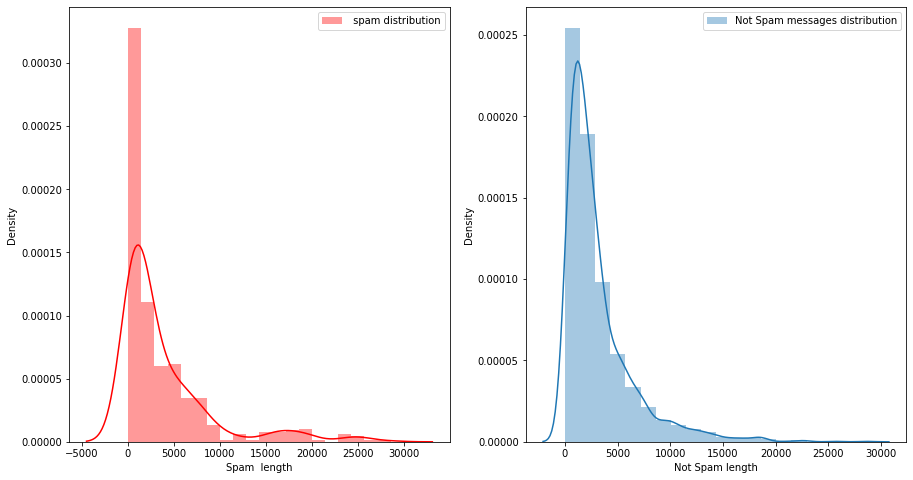

In [33]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(Email[Email['label']==1]['length1'],bins=20,ax=ax[0],label=' spam distribution',color='r')

ax[0].set_xlabel('Spam  length')
ax[0].legend()

sns.distplot(Email[Email['label']==0]['length1'],bins=20,ax=ax[1],label='Not Spam messages distribution')
ax[1].set_xlabel('Not Spam length')
ax[1].legend()

plt.show()

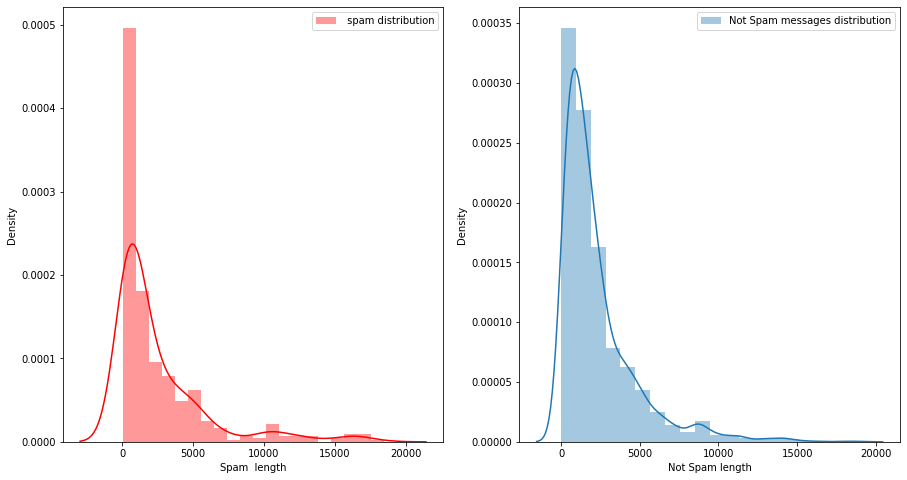

In [34]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(Email[Email['label']==1]['clean_length'],bins=20,ax=ax[0],label=' spam distribution',color='r')

ax[0].set_xlabel('Spam  length')
ax[0].legend()

sns.distplot(Email[Email['label']==0]['clean_length'],bins=20,ax=ax[1],label='Not Spam messages distribution')
ax[1].set_xlabel('Not Spam length')
ax[1].legend()

plt.show()

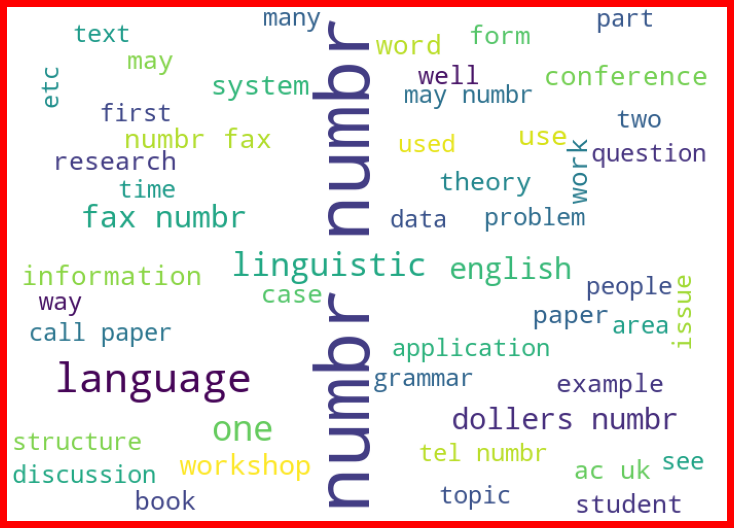

In [35]:
from wordcloud import WordCloud
spams = Email['message'][Email['label']==0]
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

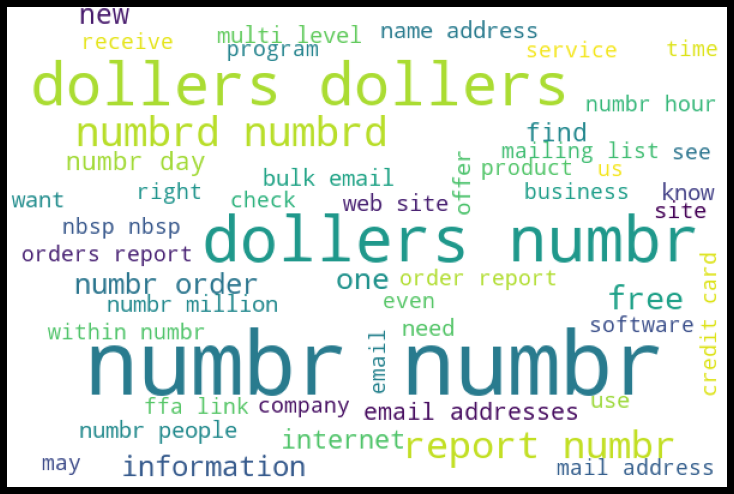

In [36]:
hams = Email['message'][Email['label']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [77]:
#Handling Imbalanced data for Spam and Not Spam Detection Model
from sklearn.utils import resample
train_majority = Email[Email.label==0]
train_minority = Email[Email.label==1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
data = pd.concat([train_minority_upsampled, train_majority])
data['label'].value_counts()

1    2363
0    2363
Name: label, dtype: int64

In [78]:
t= Email["message"].iloc[0:2831]
print(t)

0       content length numbr apple iss research center...
2       posting inquiry sergei atamas satamas umabnet ...
3       colleague researching differing degrees risk p...
4       earlier morning phone friend mine living south...
5       content length numbr call papers best good eno...
                              ...                        
2888    hello thanks stopping taken many new pics made...
2889    list owner kiddin invited join mailing list li...
2890    judging return post must sounded like kind sel...
2891    gotcha two separate fallacies argument n ary c...
2892    hello working thesis concerning attitudes towa...
Name: message, Length: 2831, dtype: object


In [79]:
text1= Email["subject"].iloc[0:2831]
print(text1)

0                 job posting apple iss research center
2          query letter frequencies text identification
3                                                  risk
4                              request book information
5            call abstracts optimality syntactic theory
                             ...                       
2888                              love profile ysuolvpv
2889                                  asked join kiddin
2890                      anglicization composers names
2891    numbr numbr comparative method n ary comparison
2892                         american english australia
Name: subject, Length: 2831, dtype: object


In [80]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')
from nltk import stem

stemmer = stem.SnowballStemmer('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [81]:
import gensim
# Converts into tokens (Alternative to word_tokenize)
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
#from nltk.stem import *
import numpy as np
np.random.seed(400)

In [82]:
# writing function for the entire dataset
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
            result.append(lemmatize_stemming(token))

    result=" ".join(result)        
    return result
        

In [83]:
for i in t:
  print(preprocess(i ))

content length numbr appl research center doller numbr million joint ventur appl institut system scienc nation univers singapor locat singapor look senior speech scientist success candid research expertis comput linguist includ natur languag process english chines statist languag model knowledg state corpus base gram languag model cach languag model speech languag model requir text speech project leader success candid research expertis expertis follow area comput linguist includ natur languag pars lexic databas design statist languag model text token normal prosod analysi substanti knowledg phonolog syntax semant chines requir knowledg acoust phonet speech signal process desir candid numbr numbr year relev work experi technic degre numbr numbr year experienc strong softwar engin skill includ design implement product requir posit knowledg unix prefer unix programm look experi unix programm prefer good industri experi join break frontier strong knowledg unix tool compil linker window exp

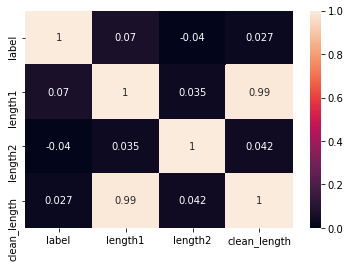

In [84]:
sns.heatmap(Email.corr(),vmax = 1, vmin = 0,annot = True)#Determine the Correlation between labels
plt.show()

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer #tfidf vectorizer to assign a vectorize value 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#ngram_range=(1,2)
tf_vec = TfidfVectorizer(ngram_range=(1,2))
feature=tf_vec.fit_transform(t.apply(preprocess))
x=feature
y=Email['label']

In [86]:
X_train,x_test,Y_train,y_test = train_test_split(x,y,random_state=42)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [88]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)


In [89]:
clfs = {'SVC' : svc,'KN'  : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}


In [90]:
def train(clf, features, targets):    
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [91]:
pred_scores_word_vectors = []
pred_scores_word = []
pred_scores = []
for k,v in clfs.items():
    train(v, X_train, Y_train)
    pred = predict(v, x_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))
    pred_scores_word.append((k, [confusion_matrix(y_test , pred)]))
    pred_scores.append((k, [classification_report(y_test , pred)]))

In [92]:
for i in range(len(pred_scores_word_vectors)):#Accuracy Score
  print(pred_scores_word_vectors[i])

('SVC', [0.9830508474576272])
('KN', [0.9251412429378532])
('NB', [0.9576271186440678])
('DT', [0.9533898305084746])
('LR', [0.9519774011299436])
('RF', [0.9491525423728814])


In [93]:
predictions=pd.DataFrame(pred_scores_word_vectors,columns=['Index',"score"])
predictions

Index                 score
0   SVC  [0.9830508474576272]
1    KN  [0.9251412429378532]
2    NB  [0.9576271186440678]
3    DT  [0.9533898305084746]
4    LR  [0.9519774011299436]
5    RF  [0.9491525423728814]

In [94]:
for i in range(len(pred_scores_word)):#Confusion Matrix
  print(pred_scores_word[i],'\n')

('SVC', [array([[584,   0],
       [ 12, 112]])]) 

('KN', [array([[574,  10],
       [ 43,  81]])]) 

('NB', [array([[584,   0],
       [ 30,  94]])]) 

('DT', [array([[568,  16],
       [ 17, 107]])]) 

('LR', [array([[584,   0],
       [ 34,  90]])]) 

('RF', [array([[584,   0],
       [ 36,  88]])]) 



In [95]:
for i in range(len(pred_scores)):#Classification Report
  print(pred_scores[i])

('SVC', ['              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       584\n           1       1.00      0.90      0.95       124\n\n    accuracy                           0.98       708\n   macro avg       0.99      0.95      0.97       708\nweighted avg       0.98      0.98      0.98       708\n'])
('KN', ['              precision    recall  f1-score   support\n\n           0       0.93      0.98      0.96       584\n           1       0.89      0.65      0.75       124\n\n    accuracy                           0.93       708\n   macro avg       0.91      0.82      0.85       708\nweighted avg       0.92      0.93      0.92       708\n'])
('NB', ['              precision    recall  f1-score   support\n\n           0       0.95      1.00      0.97       584\n           1       1.00      0.76      0.86       124\n\n    accuracy                           0.96       708\n   macro avg       0.98      0.88      0.92       708\nweighted avg     

In [96]:
from sklearn.model_selection import cross_val_score#cross validation 
from sklearn.model_selection import cross_val_predict
#l=[mnb,svc,rfc,dtc,knc,lrc]

In [97]:
def skl(ker):
  i=ker
  score=cross_val_score(i,x,y,cv=5,scoring='accuracy')
  print('score of mean \n',score.mean())
  print('score of standard devition \n',score.std())
  y_pred=cross_val_predict(mnb,x,y,cv=5)
  print('prediction \n',y_pred)

In [98]:
skl(mnb)#Multinomail 

score of mean 
 0.9586684614953166
score of standard devition 
 0.007803655660054688
prediction 
 [0 0 0 ... 0 0 0]


In [99]:
skl(svc)#Support Vector Classifier 

score of mean 
 0.9802188693825913
score of standard devition 
 0.0023449777665724737
prediction 
 [0 0 0 ... 0 0 0]


In [100]:
skl(knc)#KNN

score of mean 
 0.9332398526744816
score of standard devition 
 0.010619497642416
prediction 
 [0 0 0 ... 0 0 0]


In [101]:
skl(dtc)#Decision tree CLassifier

score of mean 
 0.9607942116776039
score of standard devition 
 0.0048927280324915804
prediction 
 [0 0 0 ... 0 0 0]


In [102]:
skl(rfc)#random Forest Classifier 

score of mean 
 0.95937642168502
score of standard devition 
 0.004754760364096491
prediction 
 [0 0 0 ... 0 0 0]


In [103]:
skl(lrc)#Logistic Regression 

score of mean 
 0.956902300247412
score of standard devition 
 0.00940098031706228
prediction 
 [0 0 0 ... 0 0 0]


In [104]:
from sklearn.metrics import roc_curve #rocauc curve for determine the result
from sklearn.metrics import roc_auc_score

In [105]:
def roc(ker):
  i=ker
  y_pred_probe=i.predict_proba(x_test)[:,0]
  y_pred_probe
  tpr,fpr,thersholds=roc_curve(y_test,y_pred_probe)
  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr,label='Multinomial')
  plt.xlabel('false Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multinomial')
  plt.show()

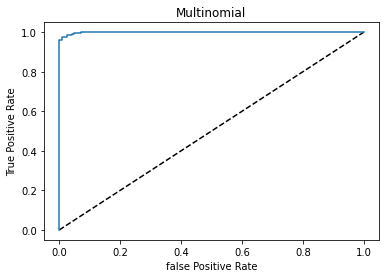

In [106]:
roc(mnb)

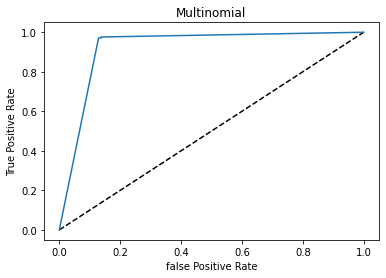

In [107]:
roc(dtc)

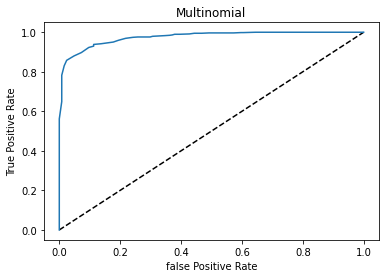

In [108]:
roc(knc)

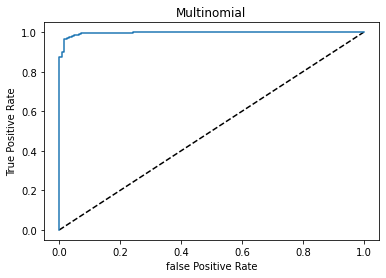

In [109]:
roc(lrc)

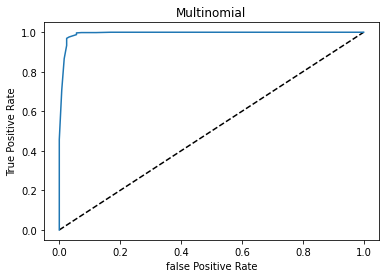

In [110]:
roc(rfc)

In [111]:
from sklearn.externals import joblib#SAve The Best Model 
joblib.dump(svc, 'best.pkl')
print ("Best Model (Naive Bayes) Saved")


Best Model (Naive Bayes) Saved


In [112]:
best = joblib.load('best.pkl')

In [113]:
best#SVC Model 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [114]:
def find(p):
    if p == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")


In [115]:
text1 = ["No. I meant the calculation is the same. That I'll call later"]#Check the prediction On Random Texts 
text2 = ["Had your contract mobile 11 Mnths? Latest Motorola Now"]
text = ["Free tones Hope you enjoyed your new content"]

integers1 = tf_vec.transform(text1)
integers2 = tf_vec.transform(text2)
integers3 = tf_vec.transform(text)


In [116]:
p1 = best.predict(integers1)[0]#Check our model is Predict a good result 
p2 = best.predict(integers2)[0]
p3 = best.predict(integers3)[0]


find(p1)
find(p2)
find(p3)



Message is NOT Spam
Message is NOT Spam
Message is SPAM
